In [1]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from PIL import Image
import os

def image_grid(imgs, cols):
    rows = (len(imgs) + cols - 1) // cols
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

# Directory containing images
image_folder = '/content/drive/MyDrive/AI/Cumputer_Vision/large_vision_models/clip_classification/images'

# Load images from the folder
images = []
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(image_folder, filename)
        images.append(Image.open(img_path))

# Create and display the grid
if images:
    grid = image_grid(images, cols=3)
    display(grid)
else:
    print("No images found in the directory.")

Output hidden; open in https://colab.research.google.com to view.

In [6]:
classes = ['giraffe', 'zebra', 'elephant', 'teddybear', 'hotdog']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True)

outputs = model(**inputs)

In [7]:
logits_per_image = outputs.logits_per_image
logits_per_image

tensor([[26.2836, 24.4544, 19.6819, 14.8227, 14.1760],
        [24.2384, 23.8031, 24.5945, 16.6669, 14.4600],
        [16.9787, 16.9936, 24.7597, 16.4111, 13.8733],
        [23.0606, 19.8492, 27.2278, 18.6095, 15.4316],
        [19.6150, 15.1748, 20.0311, 27.0995, 16.3832],
        [15.0464, 15.2344, 16.5656, 18.6200, 25.9556]], grad_fn=<TBackward0>)

In [8]:
probs = logits_per_image.softmax(dim=1)
probs

tensor([[8.6064e-01, 1.3817e-01, 1.1689e-03, 9.0662e-06, 4.7489e-06],
        [3.2517e-01, 2.1039e-01, 4.6425e-01, 1.6743e-04, 1.8424e-05],
        [4.1710e-04, 4.2338e-04, 9.9890e-01, 2.3645e-04, 1.8689e-05],
        [1.5248e-02, 6.1446e-04, 9.8395e-01, 1.7787e-04, 7.4122e-06],
        [5.6092e-04, 6.6153e-06, 8.5032e-04, 9.9856e-01, 2.2147e-05],
        [1.8274e-05, 2.2055e-05, 8.3486e-05, 6.5136e-04, 9.9922e-01]],
       grad_fn=<SoftmaxBackward0>)

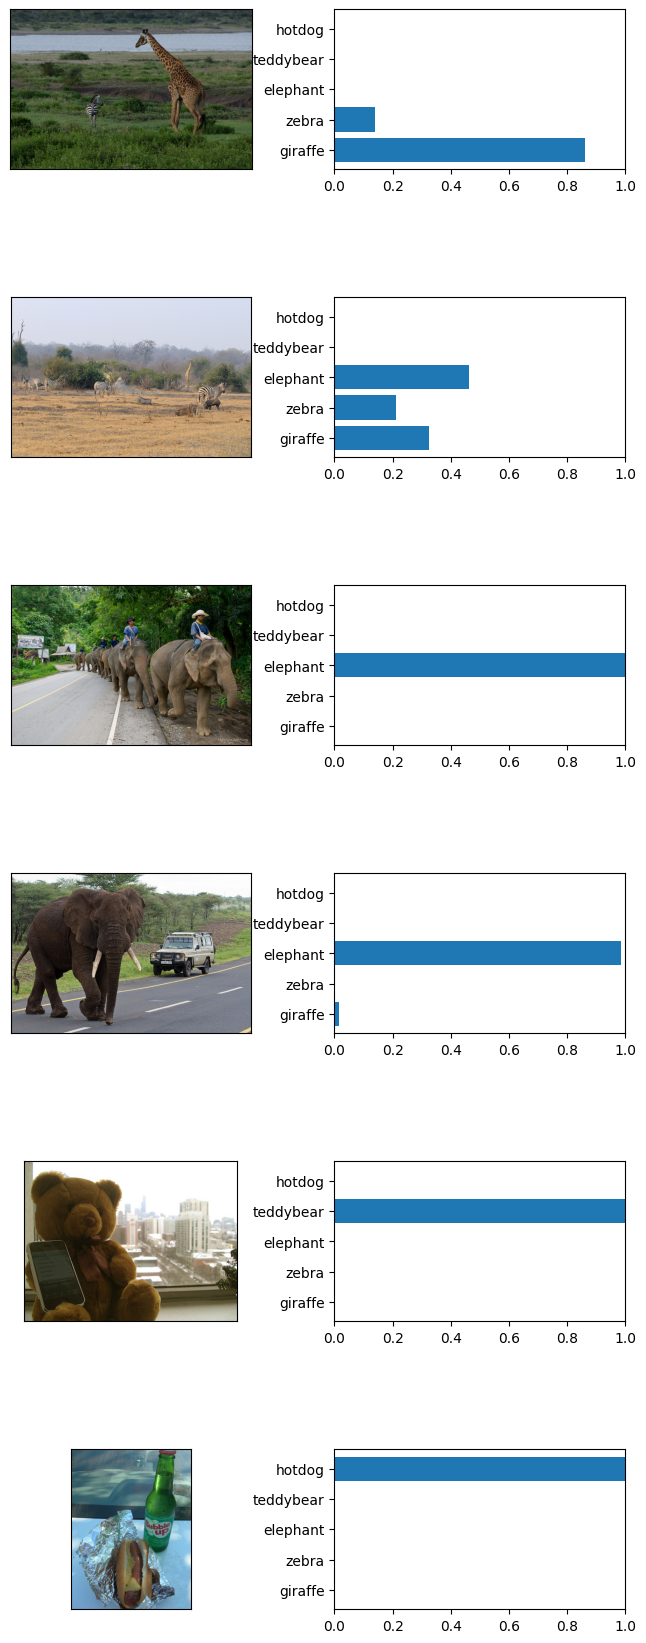

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for idx in range(len(images)):

    # show original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1 )
    plt.imshow(images[idx])
    plt.xticks([])
    plt.yticks([])

  # show probabilities
    fig.add_subplot(len(images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())),probs[idx].detach().numpy(), tick_label=classes)
    plt.xlim(0,1.0)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.8)

plt.show()